In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [120]:
df_train_x = pd.read_csv("data/splitted/Fraud_Detection_train_features.csv")
df_train_y = pd.read_csv("data/splitted/Fraud_Detection_train_target.csv")
df_val_x = pd.read_csv("data/splitted/Fraud_Detection_validation_features.csv")
df_val_y = pd.read_csv("data/splitted/Fraud_Detection_validation_target.csv")
df_test_x = pd.read_csv("data/splitted/Fraud_Detection_test_features.csv")
df_test_y = pd.read_csv("data/splitted/Fraud_Detection_test_target.csv")

#shape가 일치하는지 확인
print(df_train_x.shape)
print(df_train_y.shape)
print(df_val_x.shape)
print(df_val_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(28014, 15)
(28014, 1)
(9338, 15)
(9338, 1)
(9339, 15)
(9339, 1)


In [121]:
df_train_x.head(8)

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE
0,2019,False,1,10,0,3,0,1,311.47,0,Fulton,355,43,Financial adviser,NaN
1,2019,False,12,28,2,8,1,6,97.16,1,Meadville,964,40,Tourist information centre manager,NaN
2,2019,False,12,30,2,23,3,9,9.10,0,Milford,31394,37,Hospital doctor,NaN
3,2019,False,9,14,1,15,2,6,954.72,0,Humboldt,1179,35,"Civil engineer, contracting",NaN
4,2019,False,6,6,0,22,3,0,782.76,0,Cuthbert,5726,33,Fitness centre manager,NaN
5,2019,False,12,29,2,21,3,11,51.33,0,Blooming Grove,1563,17,Financial adviser,NaN
6,2019,False,12,15,1,10,1,4,8.79,0,Enola,969,31,"Physicist, medical",NaN
7,2019,False,3,4,0,20,3,12,1.10,0,Pembroke Township,2135,45,"Psychotherapist, child",NaN


In [122]:
df_train_y.head(8)

,IS_FRAUD
0,True
1,False
2,False
3,True
4,True
5,False
6,False
7,False


train 데이터셋을 이리저리 뜯어보고 만져보고 시각화하며 train 데이터셋의 인사이트, 패턴을 발견한다.

-> 모든 2개의 feature의 조합으로 Fraud데이터와 not fraud데이터의 분포상태를 파악하고, 패턴이 있는 조합을 추려낸다.

-> 그리고 패턴 중에서 더 선명한 패턴을 보이는 조합을 더 비중있게 다룬다.

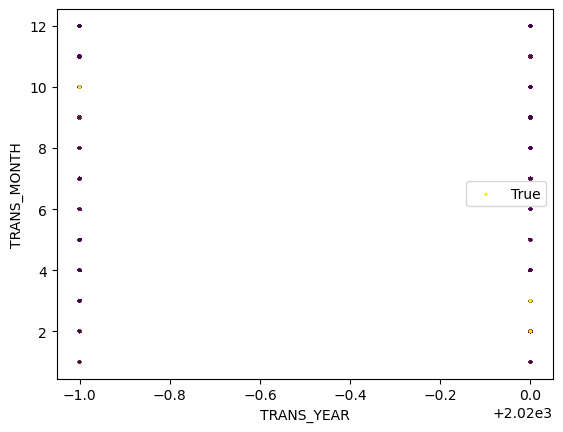

In [123]:
x_feature = "TRANS_YEAR"
y_feature = "TRANS_MONTH"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

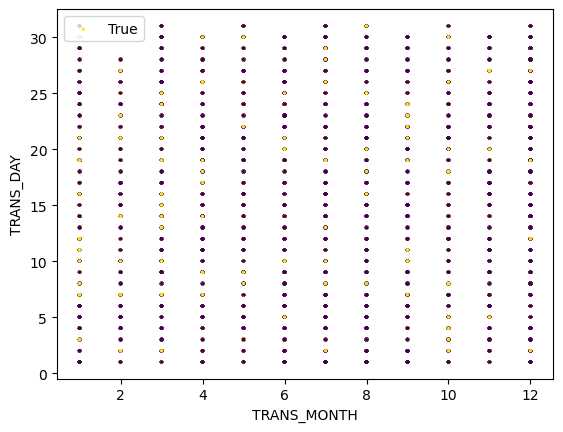

In [124]:
x_feature = "TRANS_MONTH"
y_feature = "TRANS_DAY"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

변수의 갯수가 적은 경우에는 시각화보다 표 또는 PLOT그래프로 정리하는게 더 좋음.

독립변수가 AMT, CITY_POP조합을 제외하면 전부 표나 PLOT그래프로 정리해 놓는게 유리하다

## 시각화 먼저 진행

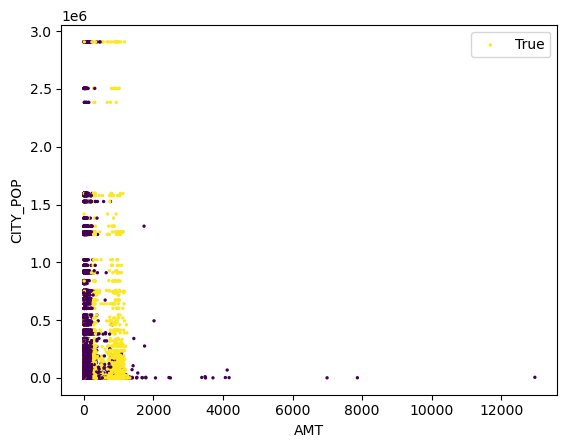

In [125]:
x_feature = "AMT"
y_feature = "CITY_POP"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

변수의 갯수가 많아서 시각화 하기에 적절하지만 이상치 제거가 필요함

## 여기서 train feature테이블과 target테이블을 concat함

In [126]:
df_train = pd.concat([df_train_x, df_train_y],axis = 1)

TRANS_YEAR                   0
IS_COVID_YEAR                0
TRANS_MONTH                  0
TRANS_DAY                    0
TRANS_DAY_SIMPLIFIED         0
TRANS_HOUR                   0
TRANS_HOUR_SIMPLIFIED        0
CATEGORY                     0
AMT                          0
GENDER                       0
CITY                         0
CITY_POP                     0
STATE                        0
JOB                          0
AGE                      27313
IS_FRAUD                     0
dtype: int64
(27313, 16)


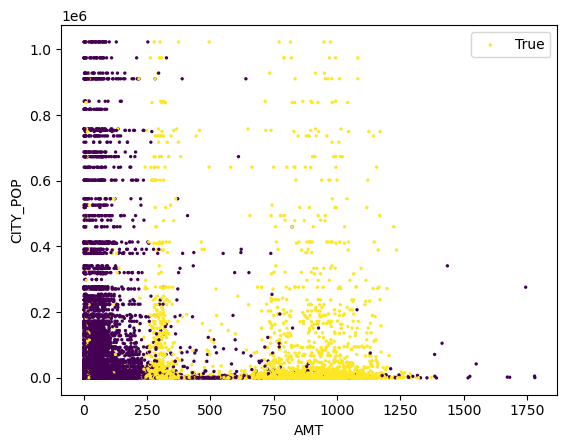

In [127]:
df_train = df_train[(df_train["CITY_POP"] < 1200000) & (df_train["AMT"] < 2000)]

print(df_train.isnull().sum())

print(df_train.shape)

x_feature = "AMT"
y_feature = "CITY_POP"

plt.scatter(x = df_train[x_feature], y = df_train[y_feature], c = df_train["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

In [128]:
df_train.head(88)

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,IS_FRAUD
0,2019,False,1,10,0,3,0,1,311.47,0,Fulton,355,43,Financial adviser,NaN,True
1,2019,False,12,28,2,8,1,6,97.16,1,Meadville,964,40,Tourist information centre manager,NaN,False
2,2019,False,12,30,2,23,3,9,9.10,0,Milford,31394,37,Hospital doctor,NaN,False
3,2019,False,9,14,1,15,2,6,954.72,0,Humboldt,1179,35,"Civil engineer, contracting",NaN,True
4,2019,False,6,6,0,22,3,0,782.76,0,Cuthbert,5726,33,Fitness centre manager,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020,True,10,25,2,17,2,6,5.68,0,Cowlesville,1166,27,Colour technologist,NaN,False
84,2020,True,1,19,1,17,2,12,16.66,0,Roma,18128,17,IT trainer,NaN,False
85,2019,False,2,24,2,3,0,0,4.76,0,Mendon,2078,29,"Scientist, audiological",NaN,False
86,2019,False,12,5,0,23,3,2,337.24,0,Pleasant Hill,12866,40,Information officer,NaN,True


## 인덱스 87번이 빠져 있음을 기억해 두자

FRAUD가 CITY_POP과는 전혀 연관이 없어 보인다. (CITY_POP이 무엇이든 간에 AMT에 대한 FRAUD의 분포는 거의 동일함)
# 결론1: CITY_POP은 모델에서 빼자

##### 이제 PLOT그래프를 그려볼 차례이다.
##### AMT는 값의 종류가 매우 많기 때문에 일정한 범위로 묶어서 PLOT그래프를 그려야 한다

# 주의!
## 한 column에서 가질 수 있는 각각의 값의 갯수가 서로 다르기 때문에, FRAUD가 아니라 FRAUD_RATIO를 사용해야 한다.

In [129]:
#The ratio of FRAUD about AMT

amt_group = pd.DataFrame(columns = ["FRAUD", "NOT_FRAUD", "FRAUD_RATIO"], index = ["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"])

amt_group = amt_group.fillna(0)

amt_group

,FRAUD,NOT_FRAUD,FRAUD_RATIO
0~250,0,0,0
251~500,0,0,0
501~750,0,0,0
751~1000,0,0,0
1001~1250,0,0,0
1251~,0,0,0


In [130]:
for i in range(df_train.shape[0]):
    try:
        if((df_train.loc[i, "AMT"] >= 0) and (df_train.loc[i, "AMT"] <= 250)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["0~250", "FRAUD"] = amt_group.loc["0~250", "FRAUD"] + 1
            else:
                amt_group.loc["0~250", "NOT_FRAUD"] = amt_group.loc["0~250", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 251) and (df_train.loc[i, "AMT"] <= 500)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["251~500", "FRAUD"] = amt_group.loc["251~500", "FRAUD"] + 1
            else:
                amt_group.loc["251~500", "NOT_FRAUD"] = amt_group.loc["251~500", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 501) and (df_train.loc[i, "AMT"] <= 750)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["501~750", "FRAUD"] = amt_group.loc["501~750", "FRAUD"] + 1
            else:
                amt_group.loc["501~750", "NOT_FRAUD"] = amt_group.loc["501~750", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 751) and (df_train.loc[i, "AMT"] <= 1000)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["751~1000", "FRAUD"] = amt_group.loc["751~1000", "FRAUD"] + 1
            else:
                amt_group.loc["751~1000", "NOT_FRAUD"] = amt_group.loc["751~1000", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 1001) and (df_train.loc[i, "AMT"] <= 1250)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["1001~1250", "FRAUD"] = amt_group.loc["1001~1250", "FRAUD"] + 1
            else:
                amt_group.loc["1001~1250", "NOT_FRAUD"] = amt_group.loc["1001~1250", "NOT_FRAUD"] + 1
        else:
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["1251~", "FRAUD"] = amt_group.loc["1251~", "FRAUD"] + 1
            else:
                amt_group.loc["1251~", "NOT_FRAUD"] = amt_group.loc["1251~", "NOT_FRAUD"] + 1
    except:
        pass
            
print(amt_group)

           FRAUD  NOT_FRAUD  FRAUD_RATIO
0~250       1414      20592            0
251~500     1419        328            0
501~750      373        111            0
751~1000    1591         34            0
1001~1250    680         25            0
1251~       4832      21088            0


### 이상치를 제거했기 때문에 index가 중간중간 빠져있다. 따라서 try-except문을 추가해서 pass하도록 함

In [131]:
amt_group["FRAUD_RATIO"] = amt_group["FRAUD"]/(amt_group["NOT_FRAUD"] + amt_group["FRAUD"])

amt_group

,FRAUD,NOT_FRAUD,FRAUD_RATIO
0~250,1414,20592,0.064255
251~500,1419,328,0.812250
501~750,373,111,0.770661
751~1000,1591,34,0.979077
1001~1250,680,25,0.964539
1251~,4832,21088,0.186420


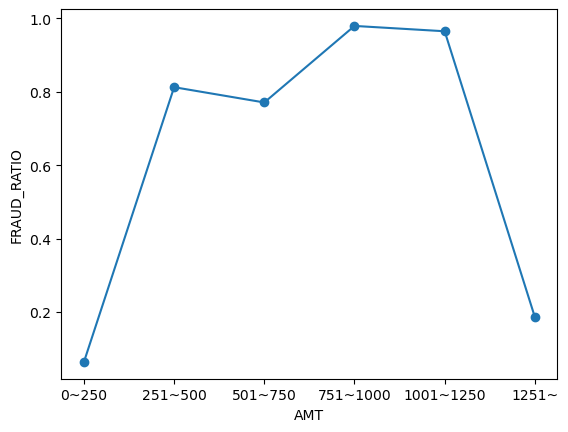

In [132]:
plt.plot(["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"], amt_group["FRAUD_RATIO"])
plt.scatter(["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"], amt_group["FRAUD_RATIO"])
plt.xlabel("AMT")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론2: AMT는 M자 모양의 모델을 선정한다.

In [133]:
type(df_train["CITY_POP"].unique())

numpy.ndarray

### 나머지 features에 대하여 FRAUD_RATIO를 구하는 함수를 정의한다.
#### PARAMETER: 첫 번째 열은 FRAUD_RATIO를 구하고 싶은 feature가, 두 번재 열은 IS_FRAUD 열이다.

In [134]:
def find_fraud_ratio(df):
    obj_column_name = list(df.columns)
    obj_column_name = obj_column_name[0]
    
    print(obj_column_name)
    
    idx_list = list(df[obj_column_name].unique())
    
    df_result = pd.DataFrame(columns = ["INDEX", "FRAUD", "NOT_FRAUD", "FRAUD_RATIO"], index = idx_list)
    df_result = df_result.fillna(0)
    df_result["INDEX"] = idx_list
    

    for i in range(df.shape[0]):
        try:
            if(df.loc[i, "IS_FRAUD"] == True):
                df_result.loc[(df.loc[i, obj_column_name]), "FRAUD"] += 1
            else:
                df_result.loc[(df.loc[i, obj_column_name]), "NOT_FRAUD"] += 1
        except:
            pass
            
    df_result["FRAUD_RATIO"] = df_result["FRAUD"] / (df_result["FRAUD"] + df_result["NOT_FRAUD"])
    
    df_result = df_result[["INDEX", "FRAUD_RATIO"]]
    
    df_result = df_result.sort_values("INDEX")
    
    df_result = df_result.rename(columns={"INDEX":obj_column_name})
    
    return df_result

리턴값은 1열이 한 feature가 가지는 값의 종류이고, 2열이 FRAUD_RATIO이다.

In [135]:
print(df_train.columns)

Index(['TRANS_YEAR', 'IS_COVID_YEAR', 'TRANS_MONTH', 'TRANS_DAY',
       'TRANS_DAY_SIMPLIFIED', 'TRANS_HOUR', 'TRANS_HOUR_SIMPLIFIED',
       'CATEGORY', 'AMT', 'GENDER', 'CITY', 'CITY_POP', 'STATE', 'JOB', 'AGE',
       'IS_FRAUD'],
      dtype='object')


TRANS_YEAR


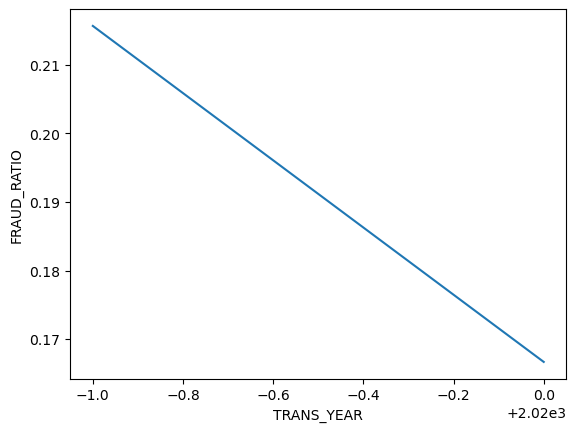

In [136]:
df_trans_year = find_fraud_ratio(df_train[["TRANS_YEAR", "IS_FRAUD"]])

plt.plot(df_trans_year["TRANS_YEAR"], df_trans_year["FRAUD_RATIO"])
plt.xlabel("TRANS_YEAR")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론3: TRANS_YEAR은 종류가 2개 뿐이기 때문에 의미가 없다(제외!)

TRANS_MONTH
    TRANS_MONTH  FRAUD_RATIO
1             1     0.500000
2             2     0.200000
3             3     0.000000
4             4     0.000000
5             5     0.222222
6             6     0.250000
7             7     0.222222
8             8     0.000000
9             9     0.142857
10           10     0.250000
11           11     0.285714
12           12     0.333333


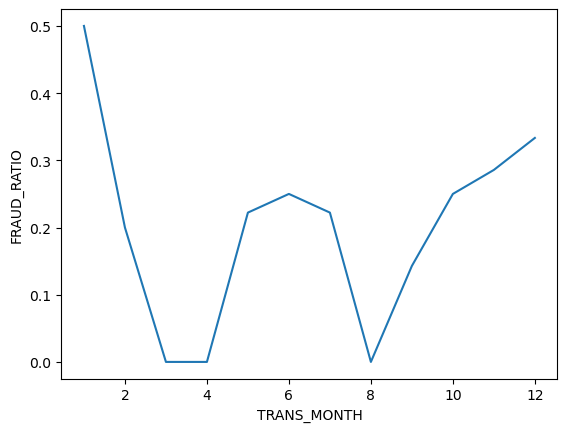

In [137]:
df_trans_month = find_fraud_ratio(df_train[["TRANS_MONTH", "IS_FRAUD"]])

print(df_trans_month)

plt.plot(df_trans_month["TRANS_MONTH"], df_trans_month["FRAUD_RATIO"])
plt.xlabel("TRANS_MONTH")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론4: TRANS_MONTH는 4차함수 모양의 모델을 선정한다.

TRANS_DAY_SIMPLIFIED
   TRANS_DAY_SIMPLIFIED  FRAUD_RATIO
0                     0     0.238095
1                     1     0.228571
2                     2     0.129032


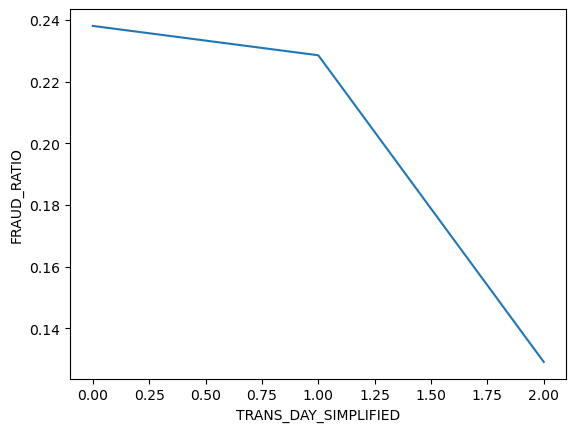

In [138]:
df_trans_day_simplified = find_fraud_ratio(df_train[["TRANS_DAY_SIMPLIFIED", "IS_FRAUD"]])

print(df_trans_day_simplified)

plt.plot(df_trans_day_simplified["TRANS_DAY_SIMPLIFIED"], df_trans_day_simplified["FRAUD_RATIO"])
plt.xlabel("TRANS_DAY_SIMPLIFIED")
plt.ylabel("FRAUD_RATIO")
plt.show()

TRANS_HOUR_SIMPLIFIED
   TRANS_HOUR_SIMPLIFIED  FRAUD_RATIO
0                      0     0.363636
1                      1     0.000000
2                      2     0.086957
3                      3     0.233333


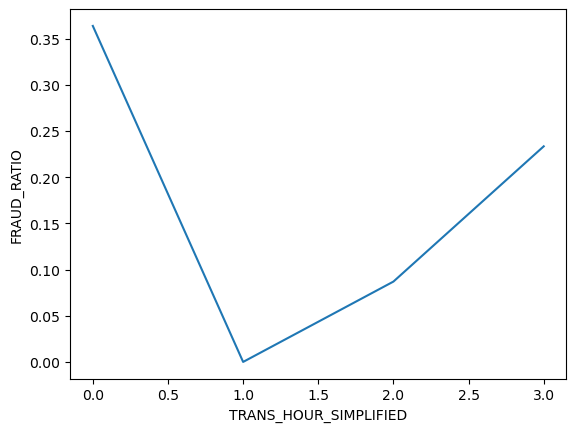

In [139]:
df_trans_hour_simplified = find_fraud_ratio(df_train[["TRANS_HOUR_SIMPLIFIED", "IS_FRAUD"]])

print(df_trans_hour_simplified)

plt.plot(df_trans_hour_simplified["TRANS_HOUR_SIMPLIFIED"], df_trans_hour_simplified["FRAUD_RATIO"])
plt.xlabel("TRANS_HOUR_SIMPLIFIED")
plt.ylabel("FRAUD_RATIO")
plt.show()

CATEGORY
    CATEGORY  FRAUD_RATIO
0          0     0.375000
1          1     0.500000
2          2     0.333333
3          3     0.125000
4          4     0.000000
5          5     0.000000
6          6     0.500000
7          7     0.333333
8          8     0.000000
9          9     0.000000
10        10     0.000000
11        11     0.000000
12        12     0.000000
13        13     0.000000


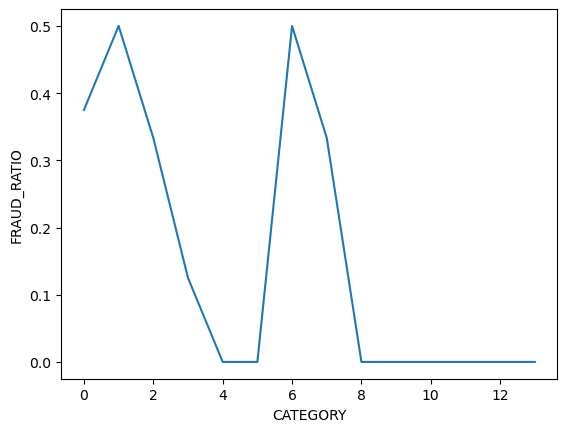

In [140]:
df_trans_category = find_fraud_ratio(df_train[["CATEGORY", "IS_FRAUD"]])

print(df_trans_category)

plt.plot(df_trans_category["CATEGORY"], df_trans_category["FRAUD_RATIO"])
plt.xlabel("CATEGORY")
plt.ylabel("FRAUD_RATIO")
plt.show()

STATE
    STATE  FRAUD_RATIO
0       0     0.000000
1       1     0.000000
2       2     0.000000
3       3     1.000000
4       4     0.000000
5       5     0.200000
6       6     0.000000
7       7          NaN
8       8     0.000000
9       9     0.000000
10     10     0.000000
11     11     0.166667
12     12     0.000000
13     13          NaN
14     14     0.333333
15     15     0.000000
16     16     0.000000
17     17     0.000000
18     18     0.000000
19     19     0.500000
20     20          NaN
21     21          NaN
22     22     0.666667
23     23     0.000000
24     24          NaN
25     25          NaN
26     26     0.000000
27     27     0.000000
28     28          NaN
29     29     0.000000
30     30     0.333333
31     31     0.600000
32     32     0.000000
33     33     0.500000
34     34     0.000000
35     35     1.000000
36     36     0.333333
37     37     0.000000
38     38          NaN
39     39          NaN
40     40     0.333333
41     41     0.000000
42   

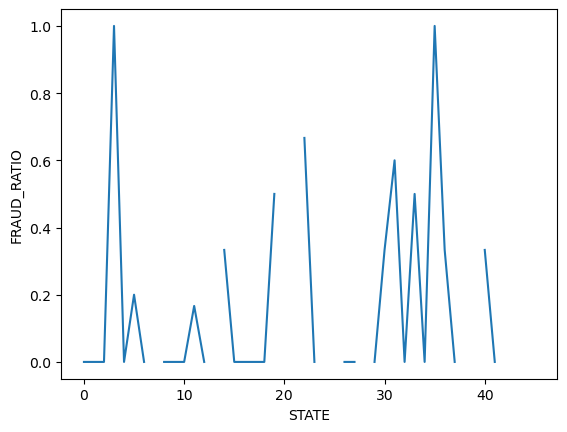

In [141]:
df_trans_state = find_fraud_ratio(df_train[["STATE", "IS_FRAUD"]])

print(df_trans_state)

plt.plot(df_trans_state["STATE"], df_trans_state["FRAUD_RATIO"])
plt.xlabel("STATE")
plt.ylabel("FRAUD_RATIO")
plt.show()